## Example using IRIS dataset

In [2]:

import pandas as pd

from scivae import VAE, Validate
from sciviso import Scatterplot

# Set the location of the mnist data
data_dir = '../tests/data/'
config = {'scale': False, # Whether to min max scale your data VAEs work best when data is pre-normalised & outliers removed for trainiing
           'batch_norm': True, 
          'loss': {'loss_type': 'mse', # mean squared error
           'distance_metric': 'mmd', # Maximum mean discrepency (can use kl but it works worse)
            'mmd_weight': 1}, 
          'encoding': {'layers': [{'num_nodes': 32, 'activation_fn': 'selu'}, # First layer of encoding
                                  {'num_nodes': 16, 'activation_fn': 'selu'}]}, # Second layer of encoding
          'decoding': {'layers': [{'num_nodes': 16, 'activation_fn': 'selu'},  # First layer of decoding
                                  {'num_nodes': 32, 'activation_fn': 'selu'}]}, # Second layer of decoding 
 'latent': {'num_nodes': 2}, 'optimiser': {'params': {}, 'name': 'adam'}} # Empty params means use default

# Path to the data
data = f'{data_dir}iris.csv'

# Build a simple vae to learn the relations in the iris dataset
df = pd.read_csv(data)

# Set up what the columns are
value_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
vae = VAE(df[value_cols].values, df[value_cols].values, df['label'].values, config, 'vae')
vae.encode('default')

# Lets have a look at a scatterplot version & apply the class colours to our plot
encoding = vae.get_encoded_data()
decoding = vae.decoder.predict(encoding)


None
--------------------------------------------------------------------------------
                               Encoder summary:	                                
--------------------------------------------------------------------------------
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
default_input (InputLayer)      [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           160         default_input[0][0]              
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32)           128         dense[0][0]                      
__________________________________________

3/3 [==============================] - 0s 8ms/step - loss: 40.6444 - val_loss: 39.1155
Epoch 44/50
3/3 [==============================] - 0s 7ms/step - loss: 40.2660 - val_loss: 38.5849
Epoch 45/50
3/3 [==============================] - 0s 8ms/step - loss: 39.0426 - val_loss: 37.8461
Epoch 46/50
3/3 [==============================] - 0s 7ms/step - loss: 39.4149 - val_loss: 37.4848
Epoch 47/50
3/3 [==============================] - 0s 7ms/step - loss: 39.8937 - val_loss: 37.2382
Epoch 48/50
3/3 [==============================] - 0s 8ms/step - loss: 38.4354 - val_loss: 36.8940
Epoch 49/50
3/3 [==============================] - 0s 7ms/step - loss: 38.0241 - val_loss: 37.5336
Epoch 50/50
3/3 [==============================] - 0s 7ms/step - loss: 39.4242 - val_loss: 36.5274


## Visualise the latent space

Visualise and colour the latent space.


<AxesSubplot:title={'center':'Latent space coloured by class'}, xlabel='VAE 0', ylabel='VAE 1'>

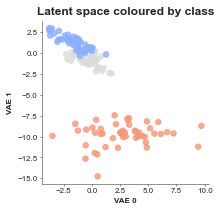

In [3]:
import seaborn as sns
vis_df = pd.DataFrame()
vis_df['latent_0'] = encoding[:, 0]
vis_df['latent_1'] = encoding[:, 1]
labels = df['label'].values
lut = dict(zip(set(labels), sns.color_palette("coolwarm", len(set(labels)))))
row_colors2 = pd.DataFrame(labels)[0].map(lut)
vis_df['label'] = row_colors2
scatter = Scatterplot(vis_df, 'latent_0', 'latent_1', colour=row_colors2, title='Latent space coloured by class',
                      xlabel='VAE 0', ylabel='VAE 1')
scatter.plot()

## Print out the accuracy

Here we just get the accuracy of the encoding space when we use it as features for a classifier.

In [4]:

vd = Validate(vae, labels)
print(vd.predict('rf', 'accuracy'))
print(vd.predict('svm', 'balanced_accuracy'))

0.9130434782608695
0.8888888888888888
